In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("BD/06_MATRICULAS_ED_SUPERIOR_VALPARAISO_2021.xlsx")

df

,ID,GENERO,EDAD,RANGO EDAD,AÑO INGRESO,SEMESTRE INGRESO,TIPO DE INSTITUCION,NOMBRE DE INSTITUCION,ACREDITACION INSTITUCIONAL,PERIODO DE ACREDITACION,...,NIVEL CARRERA,AREA CONOCIMIENTO,DURACION PLAN DE ESTUDIO (SEMESTRES),DURACION PROCESO TITULACION (SEMESTRES),DURACION TOTAL CARRERA (SEMESTRES),VALOR MATRICULA (PESOS),VALOR ARANCEL (PESOS),REGION SEDE,PROVINCIA SEDE,COMUNA SEDE
0,10,Femenino,24,20 a 24,2016,Primer semestre,Universidades Privadas,UNIVERSIDAD SANTO TOMAS,ACREDITADA,31/03/2021 AL 31/03/2025,...,Carreras Profesionales,Salud,10,0,10,130000,3713000,Valparaiso,Valparaiso,Vina Del Mar
1,25,Femenino,19,15 a 19,2021,Primer semestre,Institutos Profesionales,IP INSTITUTO DE ESTUDIOS BANCARIOS GUILLERMO S...,ACREDITADA,17/12/2017 AL 17/12/2022,...,Carreras Profesionales,Administracion y Comercio,8,0,8,190000,1900000,Valparaiso,Valparaiso,Vina Del Mar
2,28,Masculino,24,20 a 24,2019,Primer semestre,Institutos Profesionales,IP AIEP,ACREDITADA,22/10/2017 AL 22/10/2022,...,Carreras Profesionales,Administracion y Comercio,8,1,8,190000,1760000,Valparaiso,San Felipe De Aconcagua,San Felipe
3,29,Masculino,24,20 a 24,2015,Primer semestre,Universidades CRUCH,PONTIFICIA UNIVERSIDAD CATOLICA DE VALPARAISO,ACREDITADA,26/11/2015 AL 26/11/2021,...,Carreras Profesionales,Educacion,9,0,9,208000,2558000,Valparaiso,Valparaiso,Valparaiso
4,42,Masculino,26,25 a 29,2014,Primer semestre,Universidades CRUCH,UNIVERSIDAD TECNICA FEDERICO SANTA MARIA,ACREDITADA,29/12/2016 AL 29/12/2022,...,Carreras Profesionales,Arte y Arquitectura,10,1,11,186000,4350000,Valparaiso,Valparaiso,Valparaiso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109193,1048489,Masculino,40,40 y mas,2015,Segundo semestre,Universidades Privadas,UNIVERSIDAD DE LAS AMERICAS,ACREDITADA,17/03/2019 AL 17/03/2023,...,Carreras Profesionales,Ciencias Sociales,11,0,11,170000,4000000,Valparaiso,Valparaiso,Vina Del Mar
109194,1048493,Masculino,23,20 a 24,2021,Primer semestre,Institutos Profesionales,IP DUOC UC,ACREDITADA,26/08/2017 AL 26/08/2024,...,Carreras Tecnicas,Ciencias Basicas,5,1,5,176000,2060000,Valparaiso,Valparaiso,Valparaiso
109195,1048494,Masculino,23,20 a 24,2017,Primer semestre,Universidades CRUCH,UNIVERSIDAD DE PLAYA ANCHA DE CIENCIAS DE LA E...,ACREDITADA,27/09/2016 AL 27/09/2021,...,Carreras Profesionales,Educacion,9,1,9,152000,2465000,Valparaiso,Valparaiso,Valparaiso
109196,1048503,Masculino,35,35 a 39,2020,Primer semestre,Institutos Profesionales,IP AIEP,ACREDITADA,22/10/2017 AL 22/10/2022,...,Carreras Tecnicas,Administracion y Comercio,5,1,5,190000,1880000,Valparaiso,San Antonio,San Antonio


# Lista de variables cualitativas
+ GENERO
+ TIPO DE INSTITUCION
+ NOMBRE DE INSTITUCION
+ ACREDITACION INSTITUCIONAL
+ NIVEL CARRERA
+ AREA CONOCIMIENTO
+ COMUNA SEDE
+ SEMESTRE INGRESO (ordinal)
+ RANGO EDAD (ordinal)

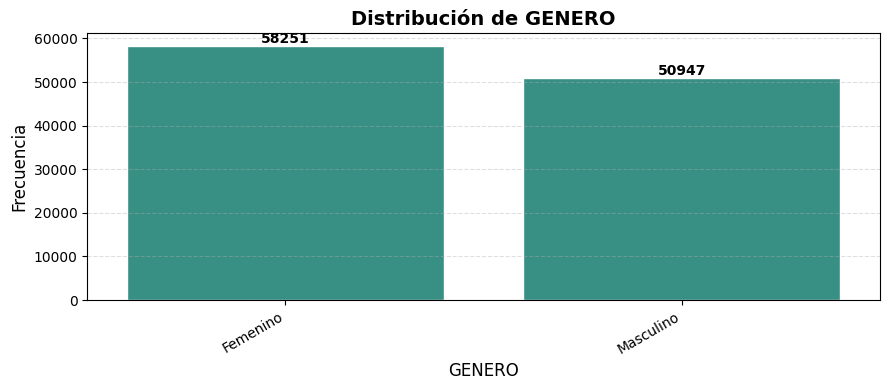

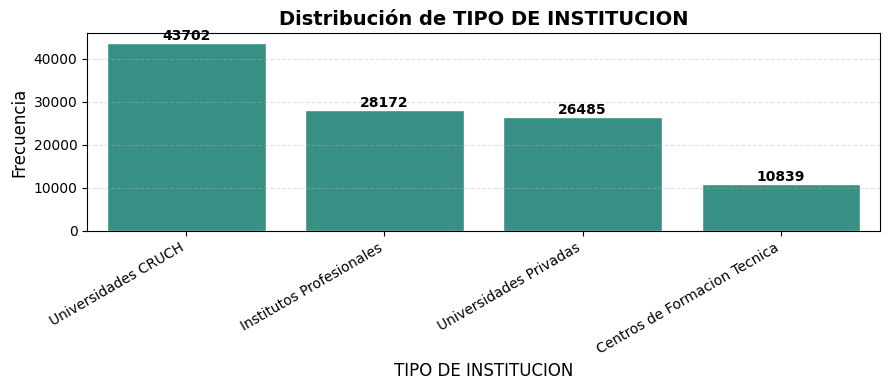

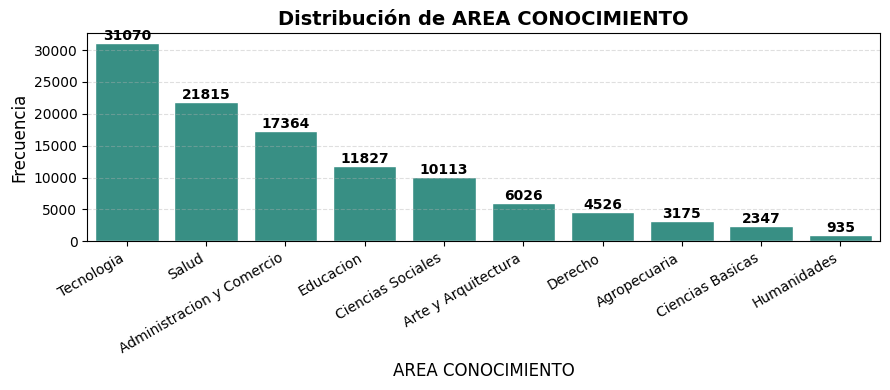

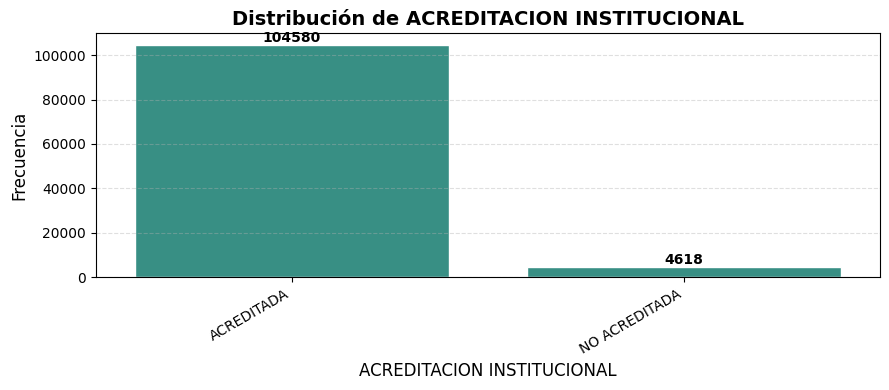

In [31]:
def grafico_barras(df, columna, color="#2a9d8f"):
    # Contar y ordenar categorías
    counts = df[columna].value_counts()
    
    plt.figure(figsize=(9,4))
    ax = sns.barplot(
        x=counts.index,
        y=counts.values,
        color=color,
        edgecolor="white"
    )

    # Etiquetas de frecuencia sobre cada barra
    for p in ax.patches:
        ax.annotate(f"{int(p.get_height())}",
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, weight='bold')

    plt.title(f"Distribución de {columna}", fontsize=14, weight="bold")
    plt.xlabel(columna, fontsize=12)
    plt.ylabel("Frecuencia", fontsize=12)
    plt.xticks(rotation=30, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()

# Genero
grafico_barras(df, "GENERO")

# Tipo de institución
grafico_barras(df, "TIPO DE INSTITUCION")

grafico_barras(df, "AREA CONOCIMIENTO")

grafico_barras(df, "ACREDITACION INSTITUCIONAL")


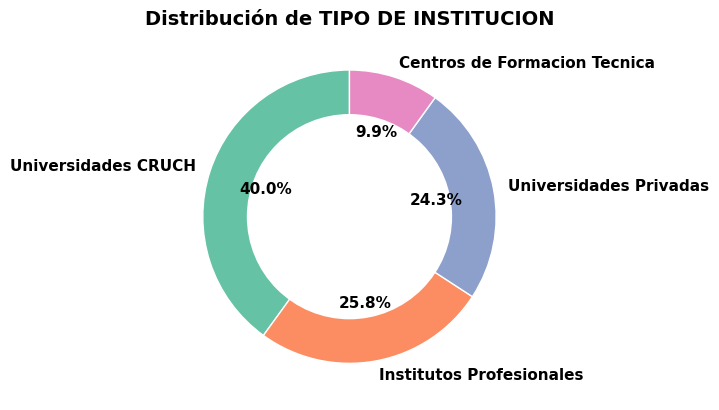

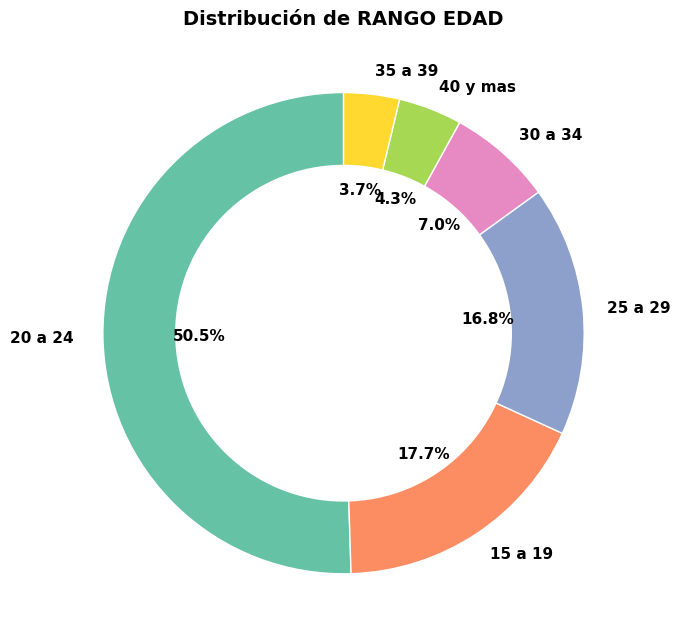

In [28]:
def grafico_torta(df, columna):
    # Datos
    counts = df[columna].value_counts()
    labels = counts.index
    sizes  = counts.values

    colores = sns.color_palette("Set2", len(labels))

    fig, ax = plt.subplots(figsize=(7,7))
    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=labels,
        autopct="%.1f%%",
        startangle=90,
        colors=colores,
        wedgeprops={'edgecolor':'white'},
        textprops={'fontsize':11, 'weight':'bold'}
    )

    # (agrega un círculo blanco en el centro)
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    fig.gca().add_artist(centre_circle)

    # Título
    ax.set_title(f"Distribución de {columna}",fontsize=14, weight="bold")

    plt.tight_layout()
    plt.show()

# Ejemplos
grafico_torta(df, "TIPO DE INSTITUCION")
grafico_torta(df, "RANGO EDAD")

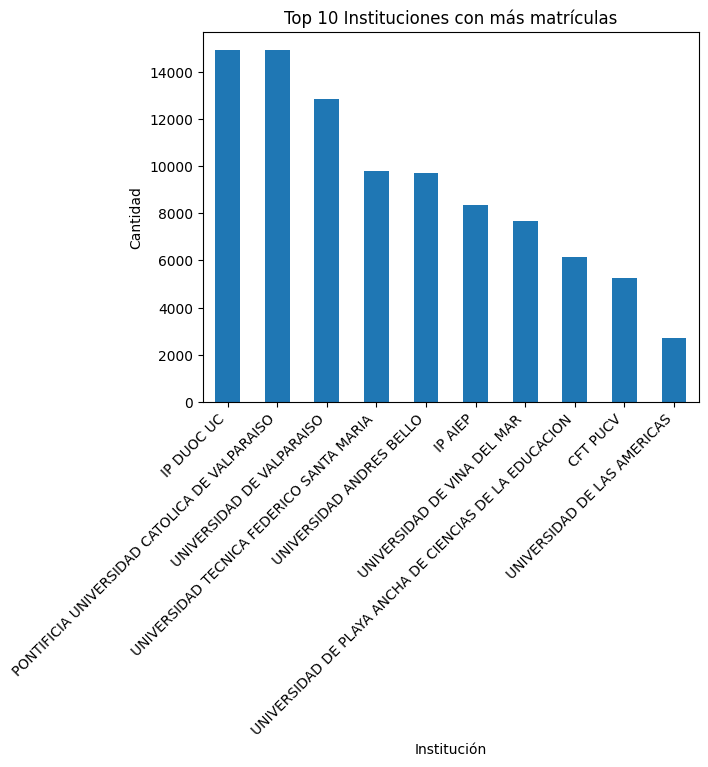

In [29]:
top10 = df["NOMBRE DE INSTITUCION"].value_counts().head(10)
top10.plot(kind="bar")

plt.title("Top 10 Instituciones con más matrículas")
plt.xlabel("Institución")
plt.ylabel("Cantidad")
plt.xticks(rotation=45, ha="right")
plt.show()